In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Basic checks
print("Shape of data:", df.shape)
df.head()

Shape of data: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 3️ Data Overview
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

# Check for duplicates
print("Duplicates:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Duplicates: 0


In [5]:
# 4️ Data Cleaning
# Drop duplicates if any
df = df.drop_duplicates()

# Handle missing values
# Example: fill numerical NA with mean, categorical with mode
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Save cleaned data
df.to_csv('Mall_Customers.csv', index=False)
print("Cleaned data saved ✅")


Cleaned data saved ✅


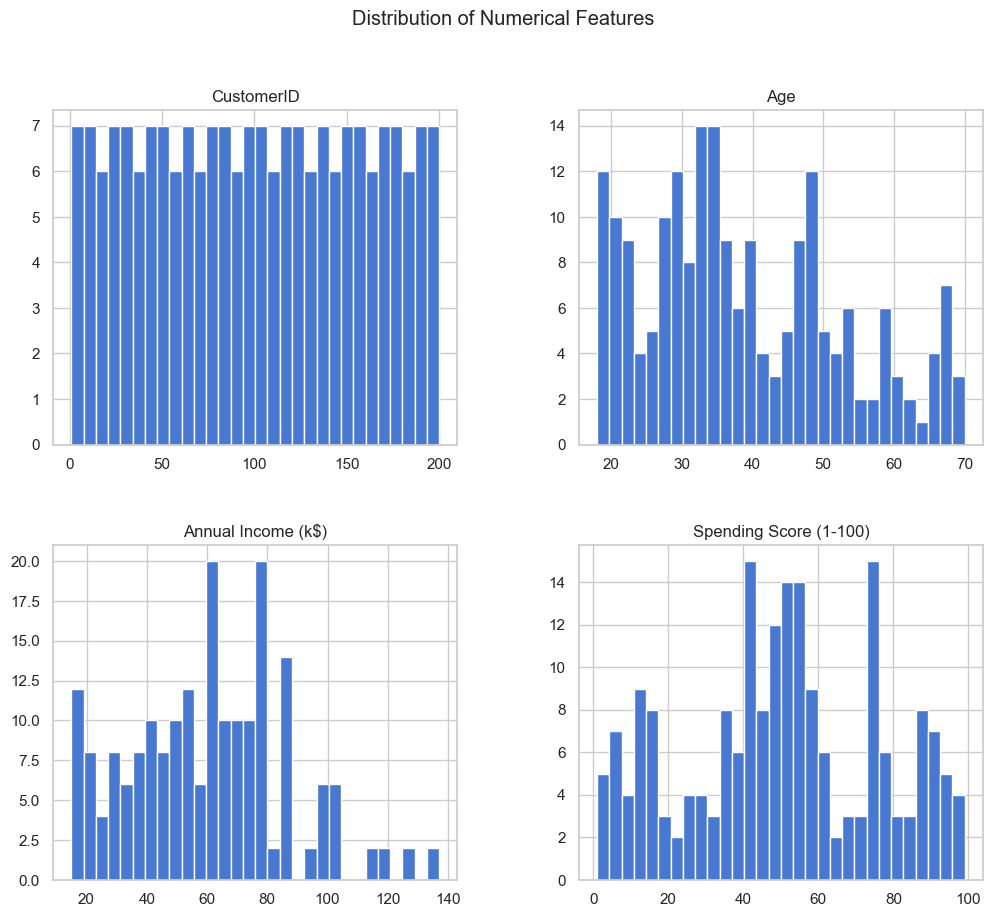

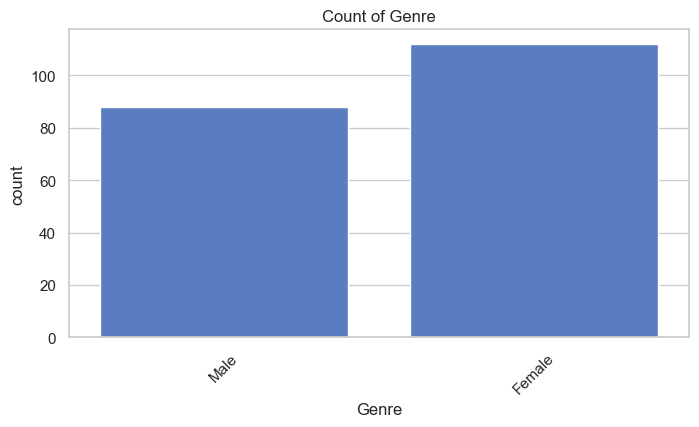

In [6]:
# 5️ Univariate Analysis
# Numeric columns
df[num_cols].hist(bins=30, figsize=(12, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


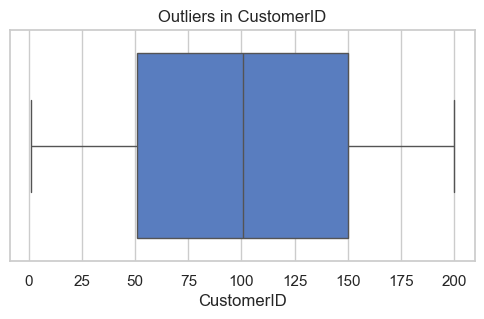

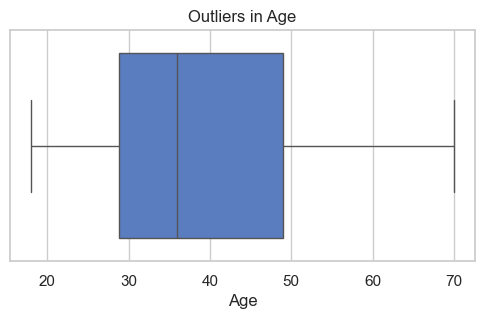

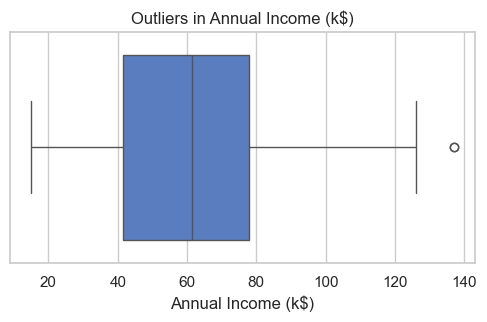

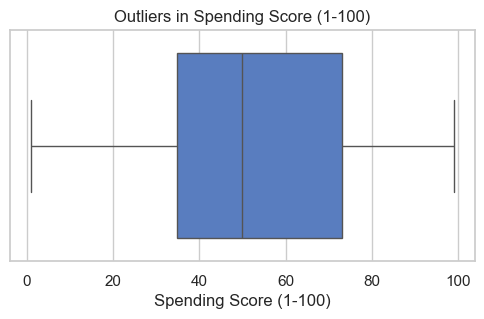

In [8]:
# 7️⃣ Outlier Detection
# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


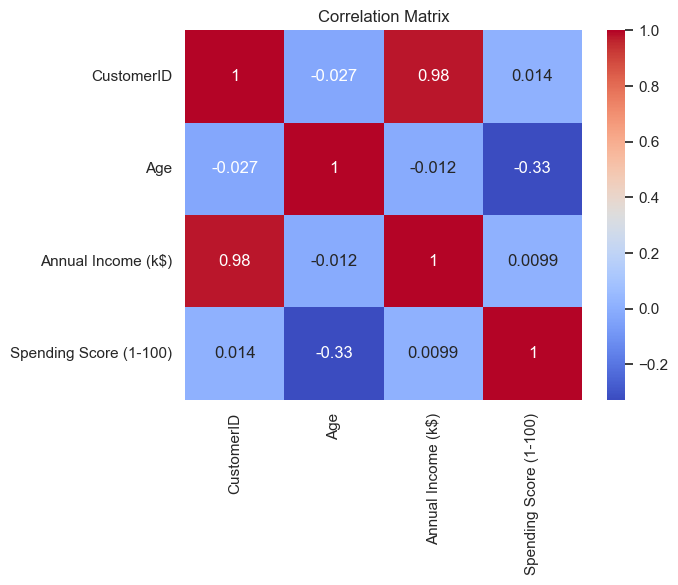

In [10]:
#Correlation matix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()